In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-12-18 15:05:37.466734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 15:05:37.616285: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 15:05:37.616311: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 15:05:38.264227: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

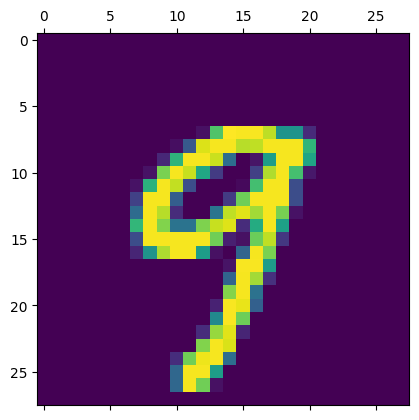

In [6]:
plt.matshow(x_train[45])

In [7]:
type(x_train)

numpy.ndarray

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train_flat = x_train.reshape(len(x_train),28*28)

In [21]:
x_test_flat = x_test.reshape(len(x_test),28*28)

In [22]:
len(x_test_flat)

10000

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5


2022-12-18 15:19:50.901498: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 958us/step - loss: 0.4673 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.2839 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9259


In [24]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.2666 - accuracy: 0.9248


[0.2665848433971405, 0.9247999787330627]

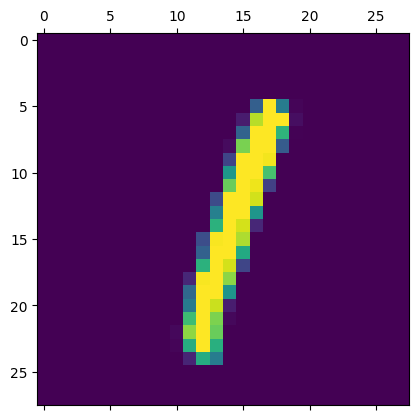

In [25]:
plt.matshow(x_test[5])

In [32]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 0s 672us/step


In [30]:
np.argmax(y_predicted)

1

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_predicted_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    3,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  925,   18,    8,    5,   11,   10,   38,    3],
       [   4,    0,   19,  914,    0,   31,    2,   11,   23,    6],
       [   2,    1,    5,    2,  912,    0,    7,    4,   11,   38],
       [  11,    2,    5,   31,   10,  783,    9,    5,   30,    6],
       [  14,    3,    8,    1,    8,   19,  899,    2,    4,    0],
       [   2,    5,   23,    5,    7,    1,    0,  948,    4,   33],
       [   8,    6,    6,   20,    9,   24,    8,   12,  875,    6],
       [  10,    7,    1,   11,   26,    5,    0,   25,    8,  916]],
      dtype=int32)>

<AxesSubplot:>

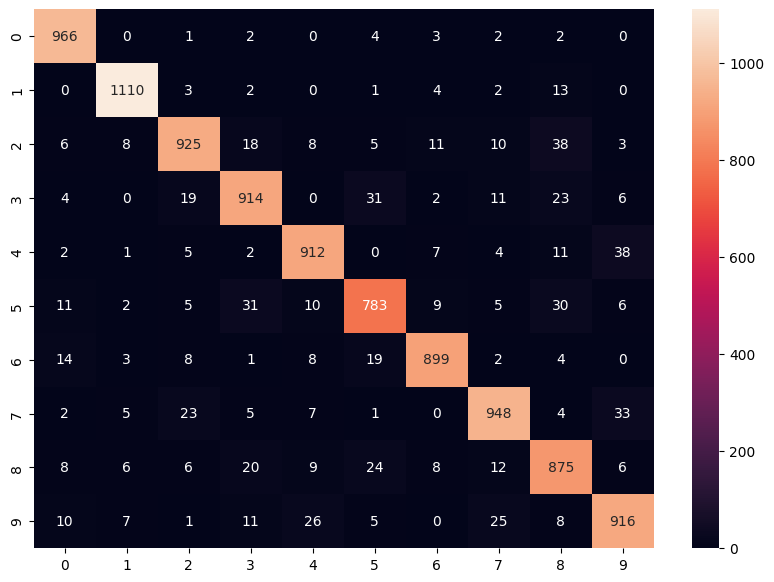

In [38]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8513 - accuracy: 0.8323
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2840 - accuracy: 0.9333
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1846 - accuracy: 0.9535
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1367 - accuracy: 0.9647
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1084 - accuracy: 0.9711


In [45]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 888us/step - loss: 0.1166 - accuracy: 0.9673


[0.11656783521175385, 0.9672999978065491]

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy: 0.8948
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2022 - accuracy: 0.9423
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1484 - accuracy: 0.9576
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.9667
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9729
Epoch 6/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0788 - accuracy: 0.9776
